한글 폰트 설정을 시도했습니다.
'weather_combined_2305-2310.csv'와 'data1_grouped.csv' 파일을 성공적으로 로드했습니다.

--- 병합된 데이터 (상위 5개) ---
          날짜  평균기온  최고기온   강수량  평균습도           소비인구
0 2023-05-01  14.6  20.8   0.0  57.0  346400.950706
1 2023-05-02  16.7  23.7   0.0  40.5  456205.539234
2 2023-05-03  19.5  26.2   0.0  52.5  454029.131154
3 2023-05-04  21.4  25.8   0.0  65.5  455677.440215
4 2023-05-05  18.4  21.6  30.2  95.3  462230.668955

--- 상관계수 행렬 ---
          평균기온      최고기온       강수량      평균습도      소비인구
평균기온  1.000000  0.941800  0.029081  0.262685  0.031853
최고기온  0.941800  1.000000 -0.146952 -0.001765 -0.010602
강수량   0.029081 -0.146952  1.000000  0.582051  0.053133
평균습도  0.262685 -0.001765  0.582051  1.000000  0.122417
소비인구  0.031853 -0.010602  0.053133  0.122417  1.000000

--- 소비인구와 날씨 변수 간 상관관계 ---
소비인구    1.000000
평균습도    0.122417
강수량     0.053133
평균기온    0.031853
최고기온   -0.010602
Name: 소비인구, dtype: float64

시각화 1: 히트맵 생성 중...
... 'correlation_heatmap_actual.png' 파일로 히트맵을 저장했습니다.

시각화 2: Pair

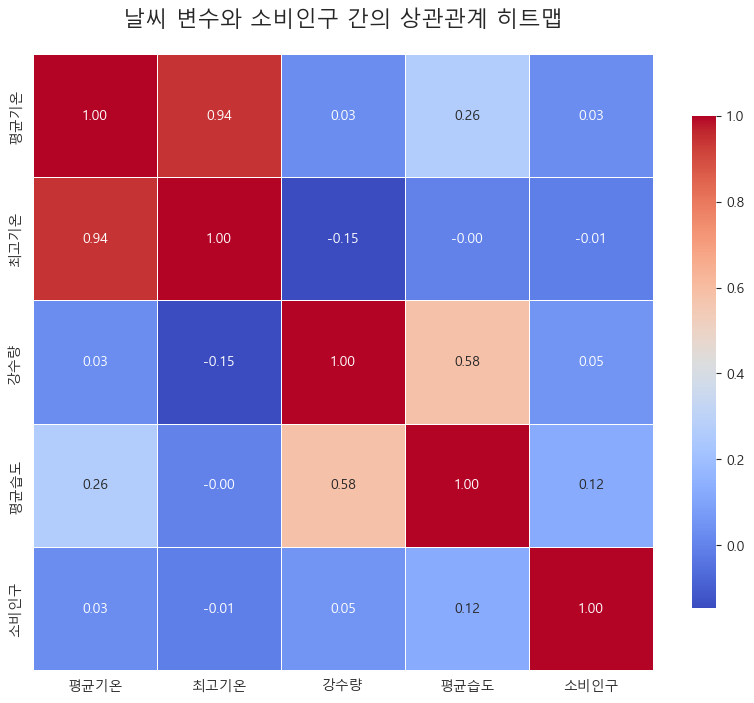

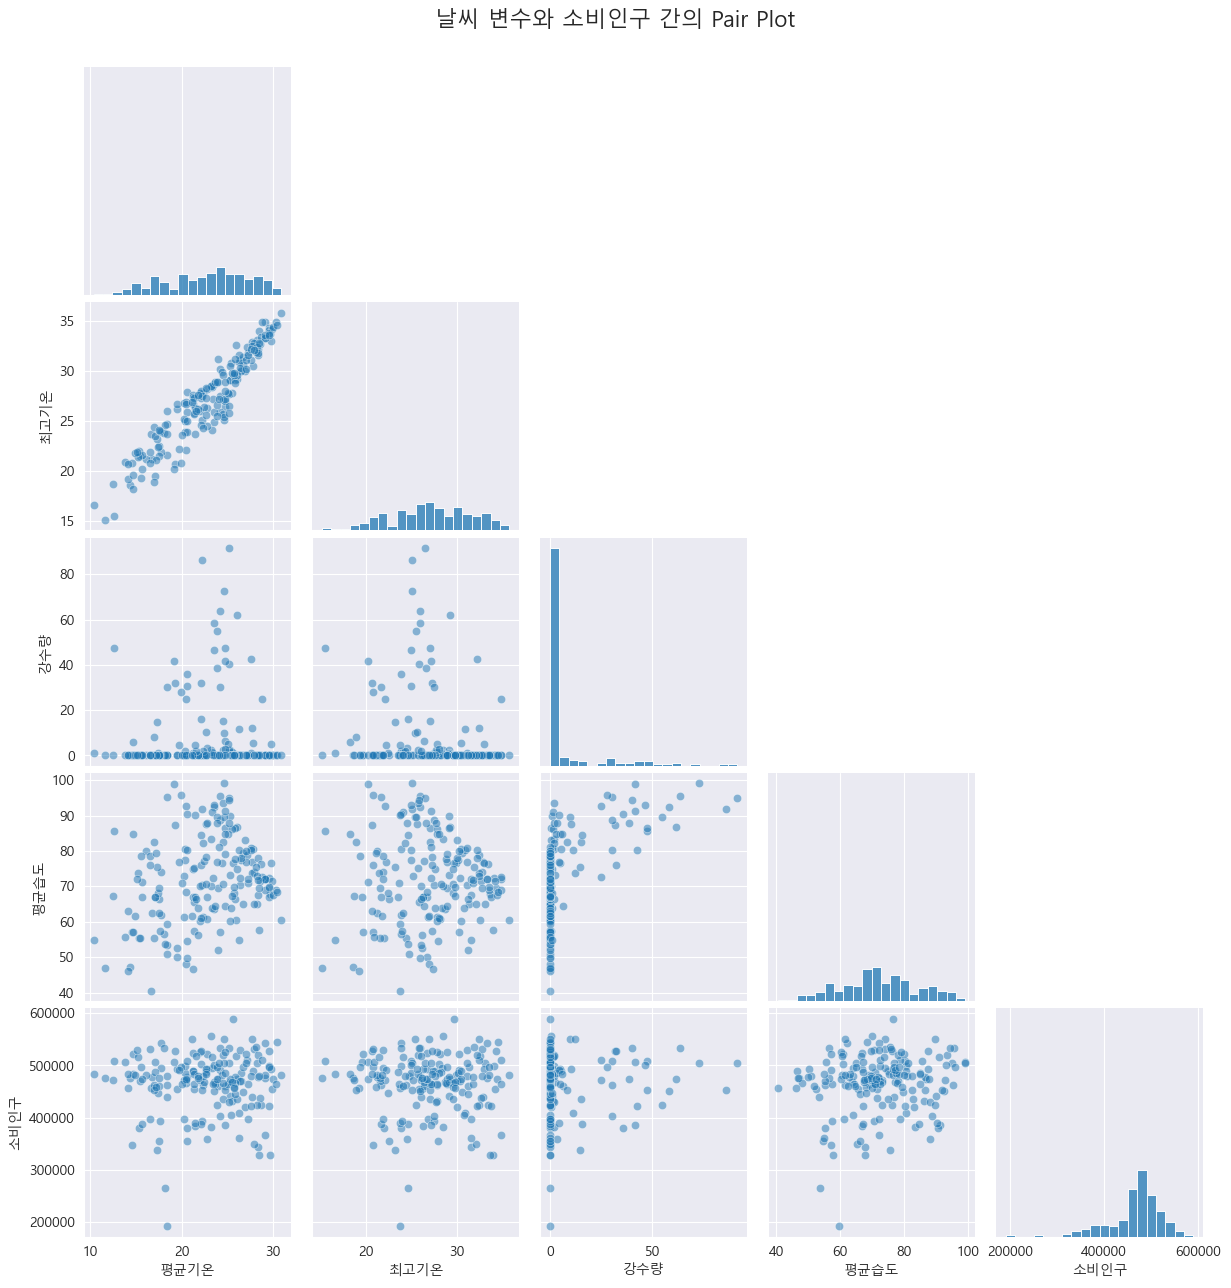

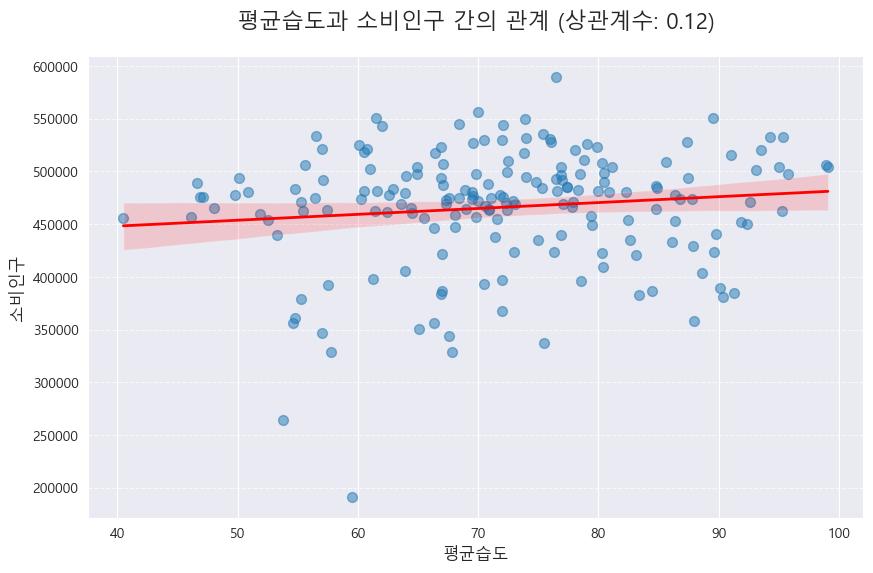

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform
import os

# -----------------------------------------------------------------
# 1. 한글 폰트 설정 (Pycharm 환경)
# (Matplotlib/Seaborn에서 한글이 깨지는 현상을 방지합니다)
# -----------------------------------------------------------------
try:
    if platform.system() == 'Windows':
        # Windows
        plt.rc('font', family='Malgun Gothic')
    elif platform.system() == 'Darwin':
        # Mac
        plt.rc('font', family='AppleGothic')
    else:
        # Linux (예: 'NanumGothic'. 해당 폰트가 설치되어 있어야 함)
        plt.rc('font', family='NanumGothic')
except Exception as e:
    print(f"경고: 한글 폰트를 설정하는 중 오류가 발생했습니다: {e}. (차트의 한글이 깨질 수 있습니다.)")

# 폰트 설정 시 마이너스 기호가 깨지는 현상 방지
plt.rcParams['axes.unicode_minus'] = False
print("한글 폰트 설정을 시도했습니다.")


# -----------------------------------------------------------------
# 2. 데이터 로드
# (사용자가 제공한 실제 파일명을 사용합니다)
# -----------------------------------------------------------------
weather_file = 'weather_combined_2305-2310.csv'
sales_file = 'data1_grouped.csv'  # '소비인구' 데이터 파일

# 파일이 존재하는지 확인
if not (os.path.exists(weather_file) and os.path.exists(sales_file)):
    print(f"오류: '{weather_file}' 또는 '{sales_file}' 파일을 찾을 수 없습니다.")
    print("스크립트와 같은 폴더에 파일이 있는지 확인하세요.")
else:
    weather_df = pd.read_csv(weather_file)
    sales_df = pd.read_csv(sales_file)
    print(f"'{weather_file}'와 '{sales_file}' 파일을 성공적으로 로드했습니다.")

    # -----------------------------------------------------------------
    # 3. 데이터 전처리 및 병합
    # (두 파일의 날짜 형식이 다르므로 통일시킵니다)
    # -----------------------------------------------------------------

    # 3-1. 날씨 데이터: '날짜' (YYYY-MM-DD 형식)를 datetime 객체로 변환
    try:
        weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
    except Exception as e:
        print(f"날씨 데이터 '날짜' 변환 오류: {e}")

    # 3-2. 소비인구 데이터: '기준일자' (YYYYMMDD 형식)를 datetime 객체로 변환
    try:
        sales_df['기준일자'] = pd.to_datetime(sales_df['기준일자'], format='%Y%m%d')
    except Exception as e:
        print(f"소비인구 데이터 '기준일자' 변환 오류: {e}")

    # 3-3. 소비인구 데이터의 컬럼명 변경 (병합을 위해)
    sales_df = sales_df.rename(columns={
        '기준일자': '날짜',
        '소비인구(명)': '소비인구'
    })

    # 3-4. '날짜'를 기준으로 두 데이터프레임 병합 (how='inner'는 두 파일에 모두 날짜가 존재하는 경우만)
    df_merged = pd.merge(weather_df, sales_df, on='날짜', how='inner')

    print("\n--- 병합된 데이터 (상위 5개) ---")
    print(df_merged.head())


    # -----------------------------------------------------------------
    # 4. 상관관계 분석
    # -----------------------------------------------------------------
    # 분석에 사용할 숫자형 열만 선택
    numeric_cols = ['평균기온', '최고기온', '강수량', '평균습도', '소비인구']
    df_numeric = df_merged[numeric_cols]

    # 상관계수 행렬 계산
    corr_matrix = df_numeric.corr()

    print("\n--- 상관계수 행렬 ---")
    print(corr_matrix)

    # 소비인구와의 상관관계만 따로 확인
    print("\n--- 소비인구와 날씨 변수 간 상관관계 ---")
    print(corr_matrix['소비인구'].sort_values(ascending=False))


    # -----------------------------------------------------------------
    # 5. 시각화 1: 상관관계 히트맵 (Heatmap)
    # -----------------------------------------------------------------
    print("\n시각화 1: 히트맵 생성 중...")
    plt.figure(figsize=(10, 8))
    sns.heatmap(
        corr_matrix,
        annot=True,     # 각 셀에 숫자(상관계수) 표시
        fmt='.2f',      # 소수점 둘째 자리까지 표시
        cmap='coolwarm',# 색상 맵 (파랑: 음의 상관, 빨강: 양의 상관)
        linewidths=.5,
        cbar_kws={"shrink": .8}
    )
    plt.title('날씨 변수와 소비인구 간의 상관관계 히트맵', fontsize=16, pad=20)
    # Pycharm 프로젝트 폴더에 .png 파일로 저장됩니다.
    plt.savefig('날씨변수_총판매량_히트맵', dpi=300, bbox_inches='tight')
    print("... 'correlation_heatmap_actual.png' 파일로 히트맵을 저장했습니다.")


    # -----------------------------------------------------------------
    # 6. 시각화 2: 페어 플롯 (Pair Plot)
    # -----------------------------------------------------------------
    print("\n시각화 2: Pair Plot 생성 중...")
    try:
        # corner=True로 중복되는 절반을 그리지 않음
        # plot_kws={'alpha': 0.5}로 점을 반투명하게
        pair_plot = sns.pairplot(df_numeric, corner=True, plot_kws={'alpha': 0.5}, diag_kws={'bins': 20})
        pair_plot.fig.suptitle('날씨 변수와 소비인구 간의 Pair Plot', y=1.03, fontsize=16)
        plt.savefig('날씨변수_총판매량_페어플롯.png', dpi=300, bbox_inches='tight')
        print("... 'pair_plot_actual.png' 파일로 Pair Plot을 저장했습니다.")
    except Exception as e:
        print(f"Pair Plot 생성 중 오류 발생: {e}")


    # -----------------------------------------------------------------
    # 7. 시각화 3: 주요 변수 상세 산점도 (Scatter Plot)
    # -----------------------------------------------------------------
    print("\n시각화 3: 주요 변수 산점도 생성 중...")

    # '소비인구'와 가장 상관관계가 높은 변수 찾기 (자기 자신 제외)
    # (분석 결과 '평균습도'가 0.12로 가장 높음)
    try:
        most_correlated_var = corr_matrix['소비인구'].drop('소비인구').idxmax()
        corr_value = corr_matrix['소비인구'][most_correlated_var]
        print(f"소비인구와 가장 상관관계가 높은 변수: {most_correlated_var} (상관계수: {corr_value:.2f})")
    except:
        most_correlated_var = '최고기온' # 예외 발생 시 기본값
        print("상관관계 계산 중 오류, '최고기온'을 기본 변수로 사용합니다.")


    plt.figure(figsize=(10, 6))
    sns.regplot(
        data=df_numeric,
        x=most_correlated_var,
        y='소비인구',
        line_kws={"color": "red", "lw": 2}, # 회귀선 스타일
        scatter_kws={"alpha": 0.5, "s": 50} # 점 스타일
    )
    plt.title(f'{most_correlated_var}과 소비인구 간의 관계 (상관계수: {corr_value:.2f})', fontsize=16, pad=20)
    plt.xlabel(f'{most_correlated_var}', fontsize=12)
    plt.ylabel('소비인구', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.savefig('날씨변수_총판매량_산점도.png', dpi=300, bbox_inches='tight')
    print(f"... 'scatter_main_var_vs_sales.png' 파일로 산점도를 저장했습니다.")

    print("\n" + "="*40)
    print("--- 모든 시각화 분석이 완료되었습니다. ---")
    print("생성된 .png 파일 3개(heatmap, pair_plot 등)를 확인하세요.")
    print("="*40)

한글 폰트 설정을 시도했습니다.
'weather_combined_2305-2310.csv'와 'data1_grouped.csv' 파일을 성공적으로 로드했습니다.
데이터 전처리 및 병합 완료.

시각화 (1): 최고기온과 소비인구 비교


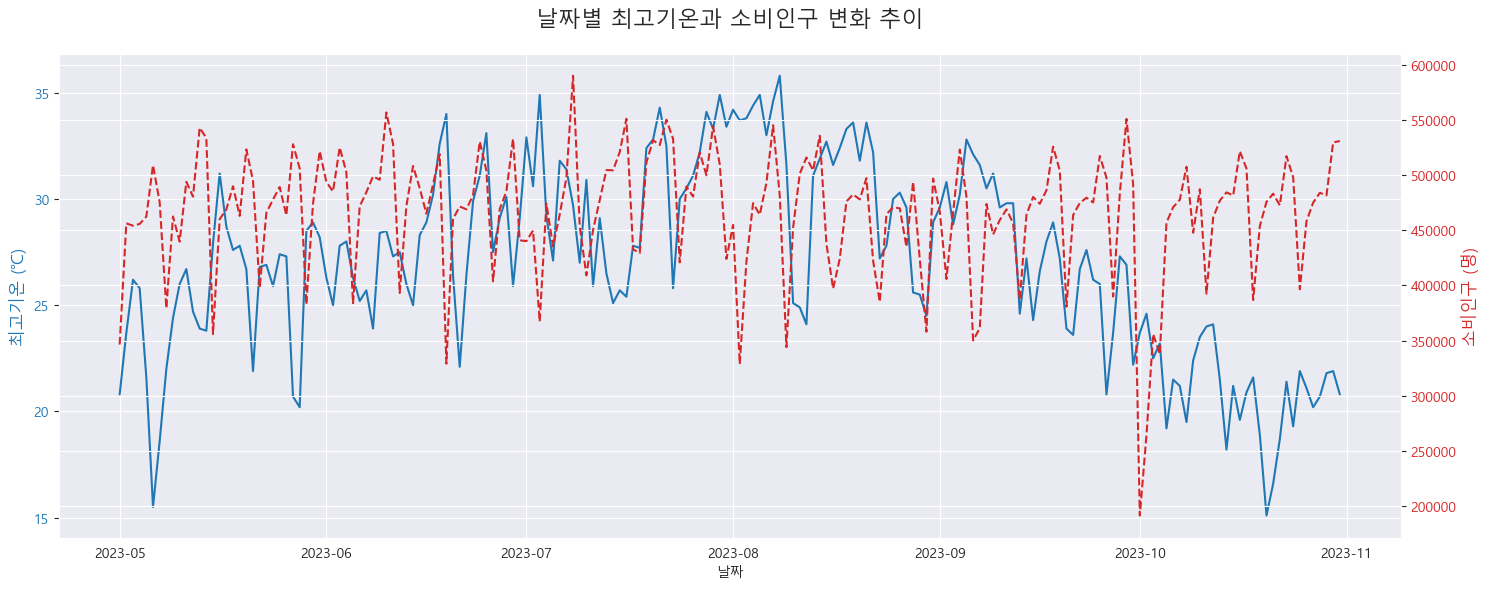


시각화 (2): 강수량과 소비인구 비교


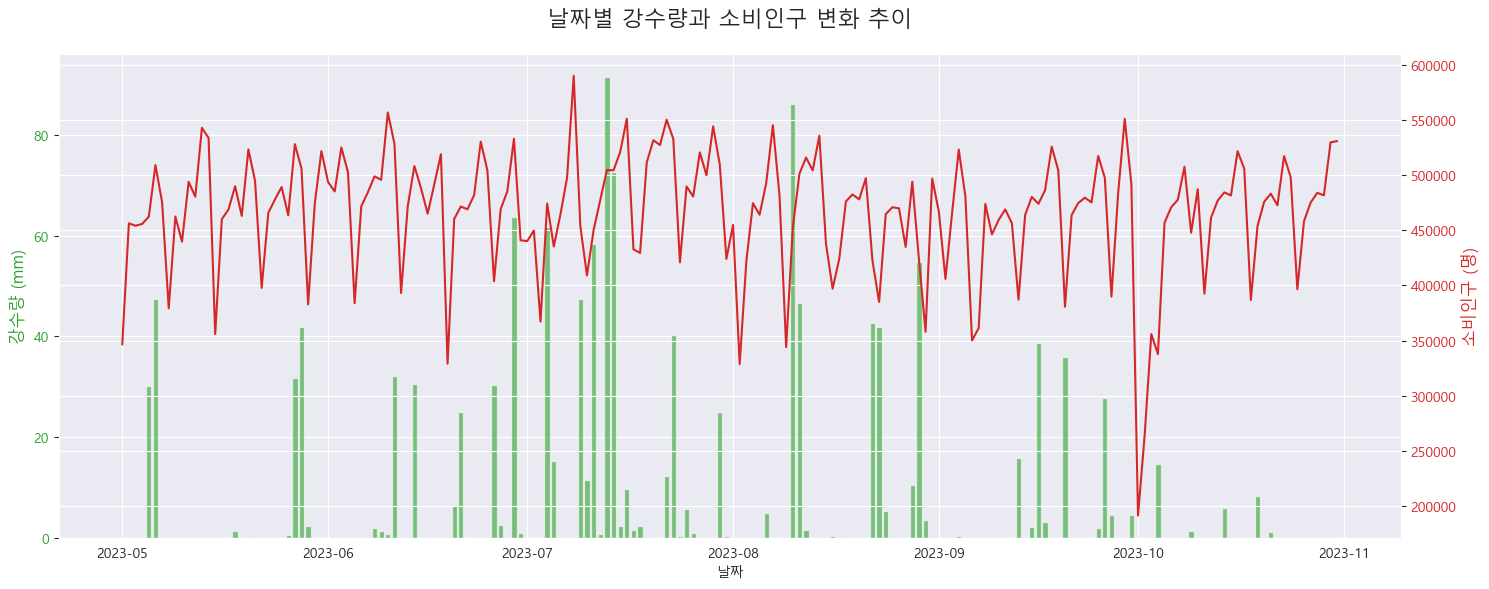


시각화 (3): 평균습도와 소비인구 비교


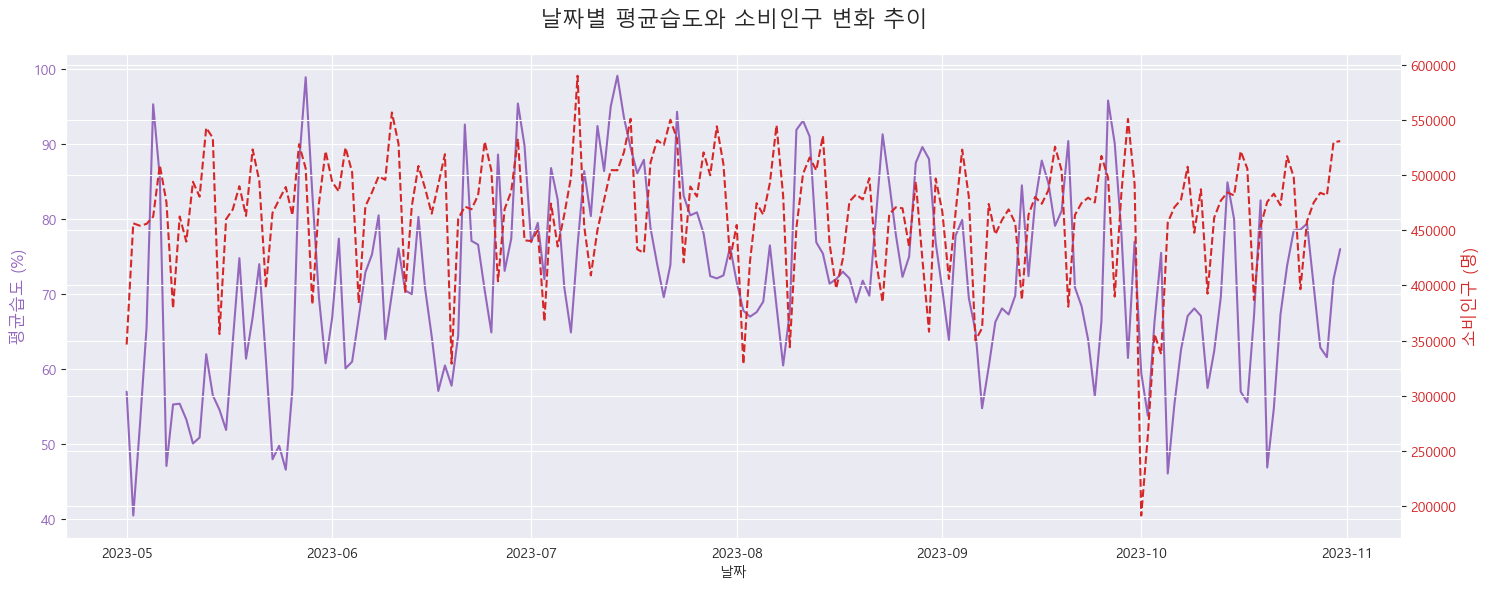


--- 이중 축 선 그래프 시각화가 완료되었습니다. ---

시각화 (4): 평균기온과 소비인구 비교


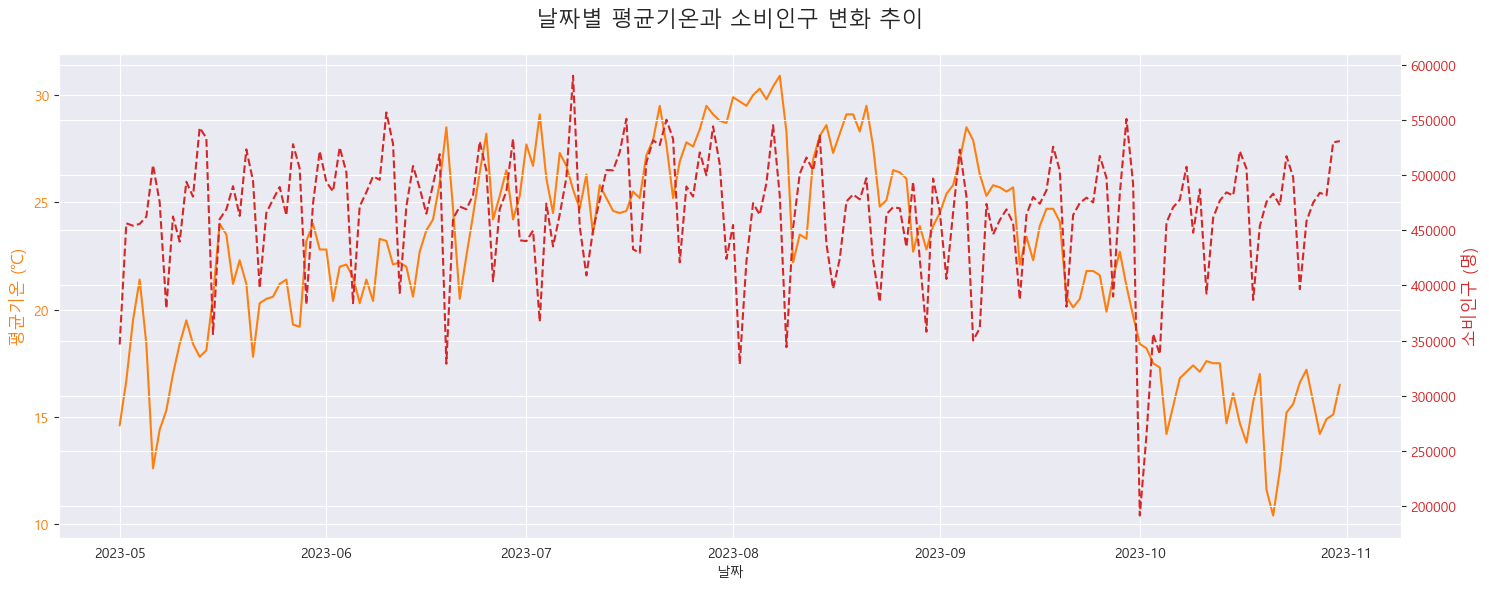


--- 평균기온 이중 축 선 그래프 시각화가 완료되었습니다. ---


In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import platform

# Jupyter Notebook에서 차트를 바로 볼 수 있게 해주는 '매직 명령어'
%matplotlib inline

# -----------------------------------------------------------------
# 1. 한글 폰트 설정
# -----------------------------------------------------------------
try:
    if platform.system() == 'Windows':
        plt.rc('font', family='Malgun Gothic')
    elif platform.system() == 'Darwin':
        plt.rc('font', family='AppleGothic')
    else:
        plt.rc('font', family='NanumGothic')
except Exception as e:
    print(f"경고: 한글 폰트 설정 오류: {e}")

plt.rcParams['axes.unicode_minus'] = False
print("한글 폰트 설정을 시도했습니다.")


# -----------------------------------------------------------------
# 2. 데이터 로드 및 전처리 (이전 단계와 동일)
# -----------------------------------------------------------------

weather_file_name = 'weather_combined_2305-2310.csv'
sales_file_name = 'data1_grouped.csv'

try:
    weather_df = pd.read_csv(weather_file_name)
    sales_df = pd.read_csv(sales_file_name)
    print(f"'{weather_file_name}'와 '{sales_file_name}' 파일을 성공적으로 로드했습니다.")
except FileNotFoundError as e:
    print(f"오류: 파일을 찾을 수 없습니다. {e}")
    print("노트북 파일과 CSV 파일이 같은 폴더에 있는지 확인하세요.")
    raise e

# 날짜 형식 변환
weather_df['날짜'] = pd.to_datetime(weather_df['날짜'], format='%Y-%m-%d')
sales_df['기준일자'] = pd.to_datetime(sales_df['기준일자'], format='%Y%m%d')

# 컬럼명 변경 및 병합
sales_df = sales_df.rename(columns={'기준일자': '날짜', '소비인구(명)': '소비인구'})
df_merged = pd.merge(weather_df, sales_df, on='날짜', how='inner')

if df_merged.empty:
    print("오류: 병합된 데이터가 없습니다. 날짜 범위를 확인하세요.")
else:
    print("데이터 전처리 및 병합 완료.")

    # -----------------------------------------------------------------
    # 3. 시각화: 이중 축 선 그래프 (Dual-Axis Plot)
    # -----------------------------------------------------------------

    # (1) 최고기온 vs 소비인구
    print("\n시각화 (1): 최고기온과 소비인구 비교")
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # 왼쪽 Y축 (최고기온)
    color = 'tab:blue'
    ax1.set_xlabel('날짜')
    ax1.set_ylabel('최고기온 (℃)', color=color, fontsize=12)
    ax1.plot(df_merged['날짜'], df_merged['최고기온'], color=color, label='최고기온')
    ax1.tick_params(axis='y', labelcolor=color)

    # 오른쪽 Y축 (소비인구)
    ax2 = ax1.twinx()  # ax1과 X축을 공유하는 두 번째 Y축
    color = 'tab:red'
    ax2.set_ylabel('소비인구 (명)', color=color, fontsize=12)
    ax2.plot(df_merged['날짜'], df_merged['소비인구'], color=color, label='소비인구', linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('날짜별 최고기온과 소비인구 변화 추이', fontsize=16, pad=20)
    fig.tight_layout()  # 레이아웃 자동 조절
    plt.savefig('최고기온_총판매량_그래프.png', dpi=300, bbox_inches='tight')
    plt.show()

    # (2) 강수량 vs 소비인구
    print("\n시각화 (2): 강수량과 소비인구 비교")
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # 왼쪽 Y축 (강수량)
    color = 'tab:green'
    ax1.set_xlabel('날짜')
    ax1.set_ylabel('강수량 (mm)', color=color, fontsize=12)
    # 강수량은 막대 그래프(bar)로 그리는 것이 더 직관적일 수 있습니다.
    ax1.bar(df_merged['날짜'], df_merged['강수량'], color=color, label='강수량', alpha=0.6)
    ax1.tick_params(axis='y', labelcolor=color)

    # 오른쪽 Y축 (소비인구)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('소비인구 (명)', color=color, fontsize=12)
    ax2.plot(df_merged['날짜'], df_merged['소비인구'], color=color, label='소비인구', linestyle='-')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('날짜별 강수량과 소비인구 변화 추이', fontsize=16, pad=20)
    fig.tight_layout()
    plt.savefig('강수량_총판매량_그래프.png', dpi=300, bbox_inches='tight')
    plt.show()

    # (3) 평균습도 vs 소비인구
    print("\n시각화 (3): 평균습도와 소비인구 비교")
    fig, ax1 = plt.subplots(figsize=(15, 6))

    # 왼쪽 Y축 (평균습도)
    color = 'tab:purple'
    ax1.set_xlabel('날짜')
    ax1.set_ylabel('평균습도 (%)', color=color, fontsize=12)
    ax1.plot(df_merged['날짜'], df_merged['평균습도'], color=color, label='평균습도')
    ax1.tick_params(axis='y', labelcolor=color)

    # 오른쪽 Y축 (소비인구)
    ax2 = ax1.twinx()
    color = 'tab:red'
    ax2.set_ylabel('소비인구 (명)', color=color, fontsize=12)
    ax2.plot(df_merged['날짜'], df_merged['소비인구'], color=color, label='소비인구', linestyle='--')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('날짜별 평균습도와 소비인구 변화 추이', fontsize=16, pad=20)
    fig.tight_layout()
    plt.savefig('평균습도_총판매량_그래프.png', dpi=300, bbox_inches='tight')
    plt.show()

print("\n--- 이중 축 선 그래프 시각화가 완료되었습니다. ---")

print("\n시각화 (4): 평균기온과 소비인구 비교")
fig, ax1 = plt.subplots(figsize=(15, 6))

# 왼쪽 Y축 (평균기온)
color = 'tab:orange' # 색상 변경
ax1.set_xlabel('날짜')
ax1.set_ylabel('평균기온 (℃)', color=color, fontsize=12)
ax1.plot(df_merged['날짜'], df_merged['평균기온'], color=color, label='평균기온')
ax1.tick_params(axis='y', labelcolor=color)

# 오른쪽 Y축 (소비인구)
ax2 = ax1.twinx()  # ax1과 X축을 공유하는 두 번째 Y축
color = 'tab:red'
ax2.set_ylabel('소비인구 (명)', color=color, fontsize=12)
ax2.plot(df_merged['날짜'], df_merged['소비인구'], color=color, label='소비인구', linestyle='--')
ax2.tick_params(axis='y', labelcolor=color)

plt.title('날짜별 평균기온과 소비인구 변화 추이', fontsize=16, pad=20)
fig.tight_layout()  # 레이아웃 자동 조절
plt.savefig('lineplot_avg_temp_vs_sales.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n--- 평균기온 이중 축 선 그래프 시각화가 완료되었습니다. ---")